**Foremost**

**Credits - Kaiye/Xi/Lu's model is used as a basis for this**

**major difference between our approach is that we are going to see if it makes sense to use returns instead of prices, and abs. change in some other metrics**

# 1) is big gaps between timeseries important? 
# 2) how to figure out most relevant columns and try to remove irrelevant to improve the test results? 

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing  
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt
from copy import deepcopy
import datetime
from tqdm import tqdm
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import sys    

# import customized utils
# from '/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/utils_folder/figsize.py' import * 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path_to_module = '/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/utils_folder/'
sys.path.append(path_to_module)


In [ ]:
print(sys.path)
from figsize import * 

['/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython', '/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/utils_folder/']


# kinda EDA but not really EDA

In [ ]:

# read dataset 
DPI_import = pd.read_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/datasets/DPI_dataset_final_222.csv', index_col='Date') 

# DPI_dataset = pd.read_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/datasets/DPI_dataset_final_222.csv', index_col='Date') 

# DPI_dataset = DPI_dataset.drop(columns='net_flow') 

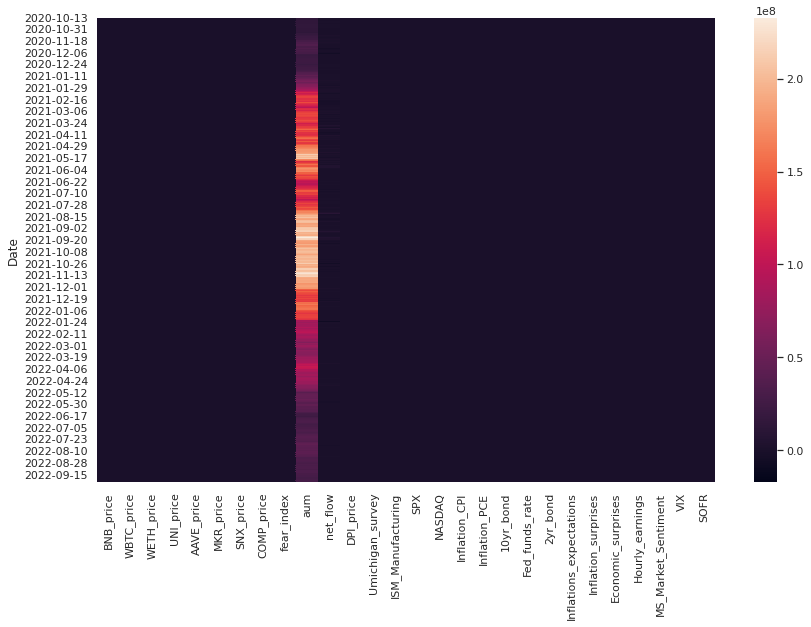

In [ ]:

DPI_dataset = DPI_import.copy()
DPI_dataset['net_flow'] = DPI_dataset['net_flow'].shift(periods=-1)
DPI_dataset = DPI_dataset.dropna()
# build a figure for EDA 
fig, ax = create_figure(1000)
sb.heatmap(DPI_dataset, ax=ax) 

In [ ]:
DPI_dataset.shape 

(714, 28)

In [ ]:
DPI_dataset.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
BNB_price,714.0,3.250718e+02,1.680486e+02,2.658913e+01,2.496510e+02,3.294972e+02,4.265995e+02,6.654986e+02
WBTC_price,714.0,3.821989e+04,1.385323e+04,1.134953e+04,2.455138e+04,3.906334e+04,4.810581e+04,6.760162e+04
WETH_price,714.0,2.317189e+03,1.110076e+03,3.677990e+02,1.558412e+03,2.231777e+03,3.134100e+03,4.786907e+03
UNI_price,714.0,1.568422e+01,1.020719e+01,2.022910e+00,6.324917e+00,1.443237e+01,2.448795e+01,4.348954e+01
AAVE_price,714.0,2.212192e+02,1.316372e+02,2.773033e+01,9.339579e+01,1.937387e+02,3.231110e+02,6.348663e+02
MKR_price,714.0,2.015003e+03,1.067528e+03,4.926945e+02,1.054620e+03,2.064963e+03,2.598044e+03,5.589366e+03
SNX_price,714.0,8.669790e+00,5.833327e+00,1.593611e+00,4.042731e+00,6.263707e+00,1.171992e+01,2.653768e+01
COMP_price,714.0,2.467062e+02,1.758617e+02,2.954849e+01,1.048619e+02,1.932418e+02,3.900938e+02,8.494576e+02
fear_index,714.0,-2.745098e-01,1.556868e+00,-2.000000e+00,-2.000000e+00,-1.000000e+00,1.000000e+00,2.000000e+00
aum,714.0,1.021045e+08,6.256933e+07,1.341308e+07,3.883109e+07,9.774459e+07,1.487725e+08,2.329499e+08


# Manual Feature Selection

In [ ]:
def get_correlation_matrix(df, filepath):
  df_corr = df.corr()
  sb.set(rc={'figure.figsize': (30, 20)})
  sb.heatmap(df_corr, cmap="Blues", center=0, annot=True)
  plt.savefig(filepath)
  plt.show()
  #plt.close()
  return 

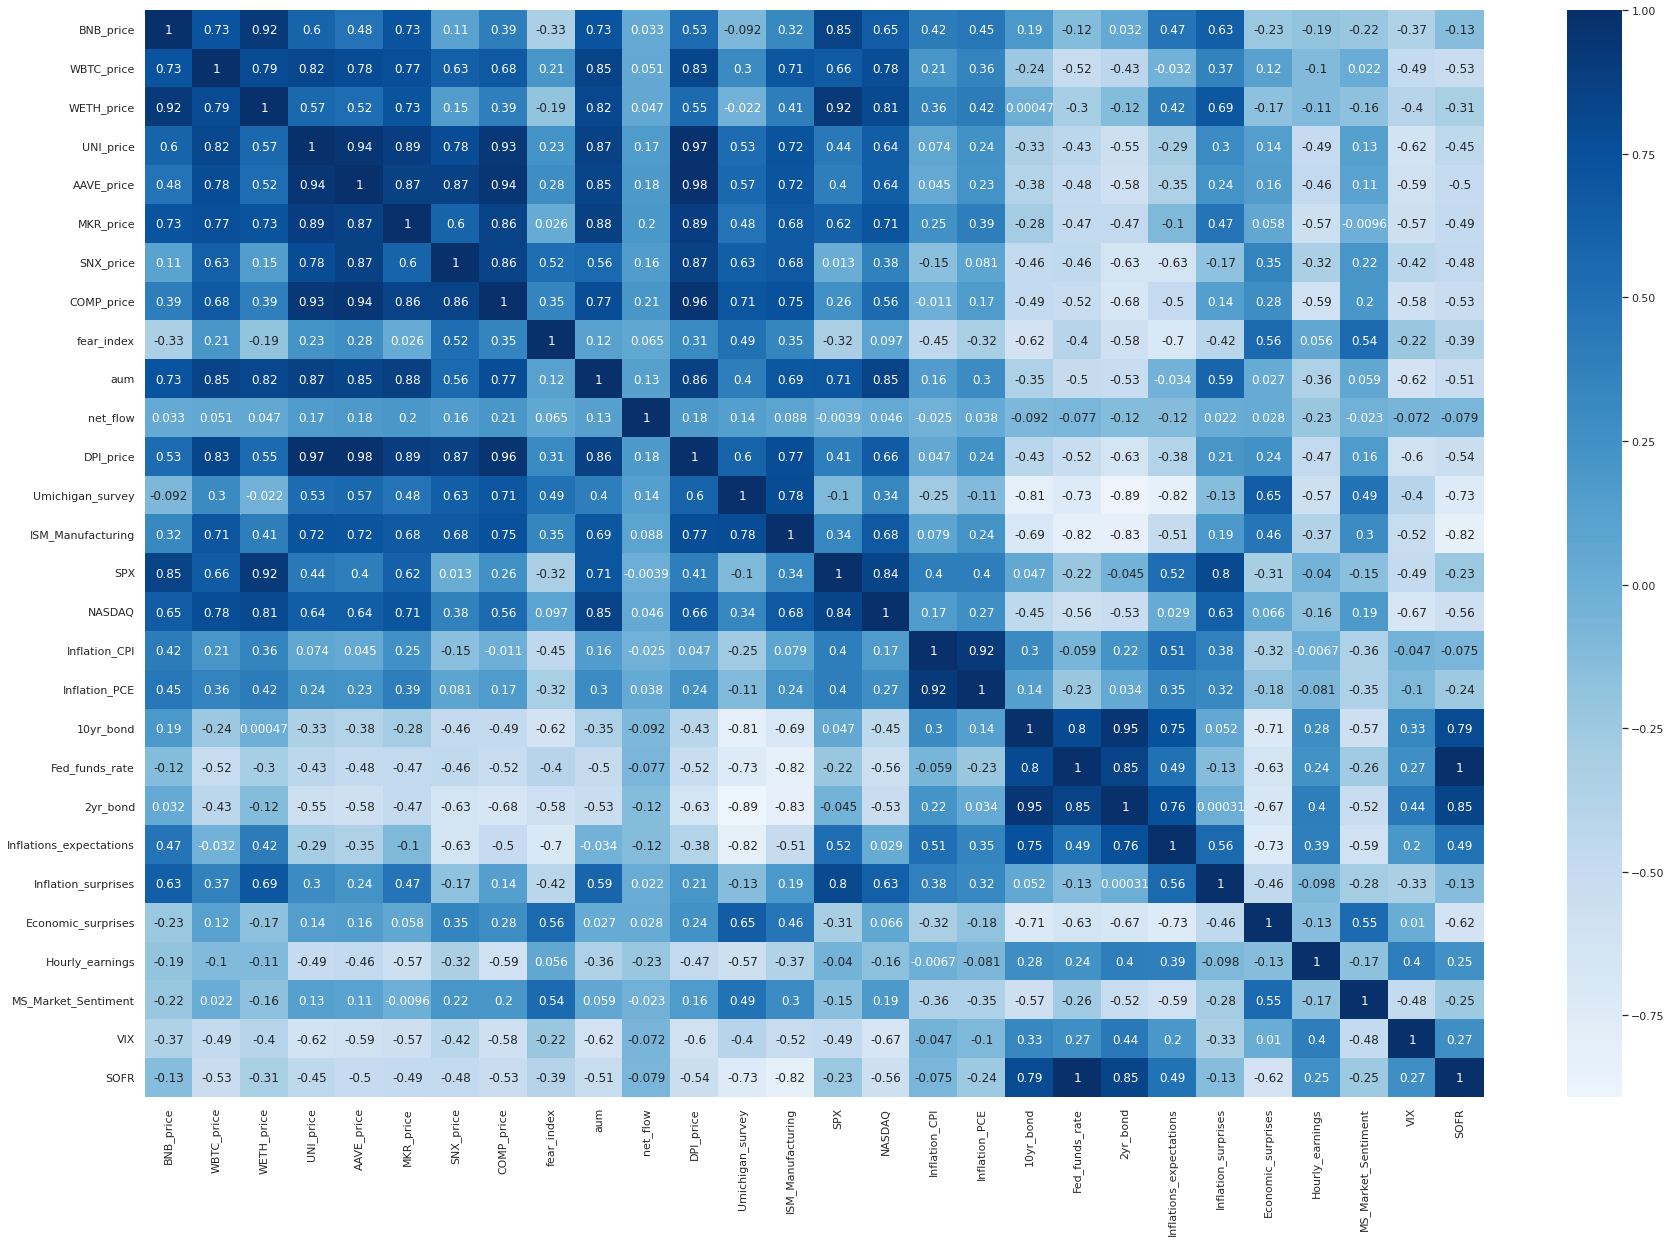

In [ ]:
get_correlation_matrix(DPI_dataset,'/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/datasets/DPI_dataset_corr_F') 

DPI_corr = DPI_dataset.corr() 

In [ ]:
order = DPI_corr.abs().unstack()
sorted = order.sort_values(ascending = False) 

sorted_2 = sorted.copy()
display(sorted_2) 
# sorted_2 < 1.0 and sorted_2 > 0.75 
type(sorted_2) 



BNB_price            BNB_price              1.000000
SPX                  SPX                    1.000000
UNI_price            UNI_price              1.000000
AAVE_price           AAVE_price             1.000000
MKR_price            MKR_price              1.000000
                                              ...   
SPX                  net_flow               0.003866
10yr_bond            WETH_price             0.000475
WETH_price           10yr_bond              0.000475
Inflation_surprises  2yr_bond               0.000310
2yr_bond             Inflation_surprises    0.000310
Length: 784, dtype: float64

pandas.core.series.Series

In [ ]:
sorted_3 = sorted_2.loc[lambda x: (x < 1.0) & (x > 0.85)]
sorted_3.drop_duplicates()

### let's write here columns to drop 
### COLS TO DROP ['Fed_funds_rate', 'DPI_price', 'COMP_price', 'UNI_price', 'SNX_price', '2yr_bond', 'aum',
### 'Inflation_PCE', 'BNB_price', 'SPX', 'WBTC_price', 'MKR_price', 'Umichigan_survey'] 

SOFR              Fed_funds_rate    0.996540
DPI_price         AAVE_price        0.978380
                  UNI_price         0.974437
                  COMP_price        0.958000
2yr_bond          10yr_bond         0.953942
COMP_price        AAVE_price        0.943151
UNI_price         AAVE_price        0.942827
COMP_price        UNI_price         0.930529
Inflation_CPI     Inflation_PCE     0.923545
WETH_price        BNB_price         0.916805
SPX               WETH_price        0.916470
Umichigan_survey  2yr_bond          0.892978
DPI_price         MKR_price         0.888027
MKR_price         UNI_price         0.887157
aum               MKR_price         0.878577
UNI_price         aum               0.873716
SNX_price         AAVE_price        0.869708
MKR_price         AAVE_price        0.867861
SNX_price         DPI_price         0.865508
aum               DPI_price         0.863423
SNX_price         COMP_price        0.857366
COMP_price        MKR_price         0.856749
Fed_funds_

**Features to include:** mainly based on the correlation
- aum
- dex activities: token_a_amount
- prices: TRIBE_price, GMI_price, WETH_price
- macro: CPI CHNG Index, VIX Index, USGG10YR Index, NYCNM1IR Index, CSIIUSD Index, ECSURPUS Index, CONSSENT Index, NAPMPMI Index, AHE YOY% Index, MSXAMSIL Index, SPX Index, LIBOR

# Data Preprocessing

In [ ]:
DPI_dataset.columns

Index(['aum', 'token_a_amount', 'net_flow', 'UNI_price', 'AAVE_price',
       'MKR_price', 'SNX_price', 'COMP_price', 'DPI_price', 'BNB_price',
       'WBTC_price', 'WETH_price', 'Inflation_CPI', 'Inflation_PCE', 'VIX',
       '10yr_bond', 'Fed_funds_rate', '2yr_bond', 'Inflations_expectations',
       'Inflation_surprises', 'Economic_surprises', 'Umichigan_survey',
       'ISM_Manufacturing', 'Hourly_earnings', 'MS_Market_Sentiment', 'SPX',
       'NASDAQ', 'SOFR'],
      dtype='object')

In [ ]:
# columns_to_drop = ['Fed_funds_rate', 'AAVE_price', 'UNI_price', 'COMP_price', 
#                    '2yr_bond', 'Inflation_PCE', 'BNB_price', 'WBTC_price', 
#                    'Umichigan_survey', 'NASDAQ', 'Inflation_surprises' ] 

# columns_to_drop =  ['Fed_funds_rate', 'DPI_price', 'COMP_price', 'UNI_price', '2yr_bond', 'aum',
#                     'Inflation_PCE', 'BNB_price', 'SPX', 'WBTC_price', 'NASDAQ', 'Umichigan_survey'] 

### others to cosnider removing - 'Inflations_expectations', 

X = DPI_dataset.copy() 
X = X.reset_index()
X.drop(columns=['Date', 'net_flow'], axis = 1, inplace=True)   ### ADD THIS LATER   
# X.drop(['BNB_returns', 'WBTC_returns', 'Inflation_PCE_change', '2yr_bond_change', 'NASDAQ_change'], axis = 1, inplace = True)
X.drop(columns_to_drop, axis = 1, inplace = True)
y = DPI_dataset['net_flow'].copy() 
y = y.reset_index() 
y = y.drop(columns='Date') 
# y = y[] 

In [ ]:
# X 
y 

,net_flow
0,729329.679212
1,861171.962951
2,344120.713620
3,-30418.516127
4,120342.655437
...,...
709,0.000000
710,0.000000
711,0.000000
712,-238218.462173


In [ ]:
### DO WE NEED TO SCALE? DOES IT MATTER WORKING WITH RETURNS/CHANGES DIRECTLY? 

X_scaled = pd.DataFrame(preprocessing.scale(X)) 
X_scaled.columns = X.columns 

# y_scaled = pd.DataFrame(preprocessing.scale(y))
# y_scaled 

# X_scaled.rename(columns = {'CPI CHNG Index': 'CPI_CHNG_Index', 'VIX Index': 'VIX_Index', 'USGG10YR Index': 'USGG10YR_Index', 
#              'NYCNM1IR Index': 'NYCNM1IR_Index', 'CSIIUSD Index': 'CSIIUSD_Index', 
#              'ECSURPUS Index': 'ECSURPUS_Index', 'CONSSENT Index': 'CONSSENT_Index',
#              'NAPMPMI Index': 'NAPMPMI_Index', 'AHE YOY% Index': 'AHE_YOY_Index',
#              'MSXAMSIL Index': 'MSXAMSIL_Index', 'SPX Index': 'SPX_Index'}, inplace = True)

In [ ]:
# X_scaled['Date'] = DPI_dataset['Date'] 
X_scaled 

,WETH_price,AAVE_price,MKR_price,SNX_price,fear_index,ISM_Manufacturing,Inflation_CPI,10yr_bond,Inflations_expectations,Inflation_surprises,Economic_surprises,Hourly_earnings,MS_Market_Sentiment,VIX,SOFR
0,-1.744141,-1.292962,-1.343510,-0.708925,0.819211,-1.089124,-0.984819,-1.459782,-1.368131,-1.210577,2.200490,0.096965,1.827274,0.725685,-0.423469
1,-1.745764,-1.281396,-1.346716,-0.723590,0.176445,-1.089124,-0.984819,-1.459782,-1.368131,-1.210577,2.200490,0.096965,1.844922,0.791964,-0.423469
2,-1.748945,-1.318209,-1.359610,-0.775235,0.819211,-1.089124,-0.984819,-1.459782,-1.368131,-1.210577,2.349315,0.096965,1.774331,0.906447,-0.409276
3,-1.755397,-1.365164,-1.374932,-0.803288,0.176445,-1.089124,-0.984819,-1.433031,-1.368131,-1.210577,2.423728,0.096965,1.668443,0.994820,-0.423469
4,-1.757319,-1.368608,-1.370648,-0.811598,0.819211,-1.089124,-0.984819,-1.433031,-1.368131,-1.210577,2.423728,0.096965,1.668443,0.994820,-0.423469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,-0.929931,-1.111541,-1.302863,-1.076877,-1.109086,-1.996150,-1.269154,2.526163,0.625461,-1.087244,-1.334114,0.452917,-0.961094,0.982769,3.692352
710,-0.903480,-1.104734,-1.272651,-1.064710,-1.109086,-1.996150,-1.269154,2.486036,0.625461,-1.087244,-1.334114,0.452917,-1.190516,1.498946,3.692352
711,-0.890438,-1.100046,-1.251301,-1.060028,-1.109086,-1.996150,-1.269154,2.486036,0.625461,-1.087244,-1.334114,0.452917,-1.190516,1.498946,3.692352
712,-0.903610,-1.106602,-1.238589,-1.074666,-1.109086,-1.996150,-1.269154,2.486036,0.625461,-1.087244,-1.334114,0.452917,-1.190516,1.498946,3.692352


In [ ]:
X_scaled_and_y = X_scaled.merge()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,  random_state = 1000)   ## test_size=0.20, ## X_scaled 

# Linear Regression

## Ordinary Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
ols_train = LinearRegression().fit(X_train, y_train)
y_train_predicted = ols_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = ols_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)

mse=mean_squared_error(y_test,y_test_predicted)
print("MSE result is: {}".format(mse))

print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test)) 

MSE result is: 1556440795021.1345
Training set R-squared is: 0.08655909080786628
Test set R-squared is: 0.0953385583712737


## Forward Model Selection: AIC

In [ ]:
import statsmodels.formula.api as smf 
def forward_select(X, y):
  data = pd.concat([X, y], axis = 1)
  variate = set(X.columns)
  selected = []
  # set the scores to be infinite
  current_score, best_new_score = float('inf'), float('inf')
  # perform the forward selection
  while variate:
    aic_with_variate = []
    for candidate in variate:
      # set the regression model
      formula = "{}~{}".format(y.columns[0], "+".join(selected + [candidate]))
      print(variate)
      print(formula)
      aic = smf.ols(formula = formula, data = data).fit().aic
      aic_with_variate.append((aic,candidate))
    aic_with_variate.sort(reverse = True)
    best_new_score, best_candidate = aic_with_variate.pop()
    if current_score > best_new_score:
      variate.remove(best_candidate)
      selected.append(best_candidate)
      current_score = best_new_score
      print("AIC is {}, continuing!".format(current_score))
    else:
      print("Forward Selection Done")
      break
  # final regression model
  formula = "{}~{}".format(y.columns[0], "+".join(selected))
  print("Final Regression model is {}".format(formula))
  model = smf.ols(formula = formula, data = data).fit()
  return(model) 

In [ ]:
aic_train = forward_select(X_train, pd.DataFrame(y_train)) 

{'NASDAQ', 'UNI_price', 'Inflation_CPI', 'Inflations_expectations', 'SOFR', 'ISM_Manufacturing', 'MS_Market_Sentiment', '2yr_bond', 'COMP_price', 'WETH_price', '10yr_bond', 'Inflation_PCE', 'SNX_price', 'Umichigan_survey', 'MKR_price', 'AAVE_price', 'Hourly_earnings', 'SPX', 'Inflation_surprises', 'DPI_price', 'aum', 'Economic_surprises', 'WBTC_price', 'token_a_amount', 'VIX', 'Fed_funds_rate', 'BNB_price'}
net_flow~NASDAQ
{'NASDAQ', 'UNI_price', 'Inflation_CPI', 'Inflations_expectations', 'SOFR', 'ISM_Manufacturing', 'MS_Market_Sentiment', '2yr_bond', 'COMP_price', 'WETH_price', '10yr_bond', 'Inflation_PCE', 'SNX_price', 'Umichigan_survey', 'MKR_price', 'AAVE_price', 'Hourly_earnings', 'SPX', 'Inflation_surprises', 'DPI_price', 'aum', 'Economic_surprises', 'WBTC_price', 'token_a_amount', 'VIX', 'Fed_funds_rate', 'BNB_price'}
net_flow~UNI_price
{'NASDAQ', 'UNI_price', 'Inflation_CPI', 'Inflations_expectations', 'SOFR', 'ISM_Manufacturing', 'MS_Market_Sentiment', '2yr_bond', 'COMP_price

SyntaxError: ignored

In [ ]:
y_train_predicted4 = aic_train.predict(X_train)
rmse_train4 = r2_score(y_true = y_train, y_pred = y_train_predicted4)
y_test_predicted4 = aic_train.predict(X_test)
rmse_test4 = r2_score(y_true = y_test, y_pred = y_test_predicted4)
print("Training set R-squared is: {}".format(rmse_train4))
print("Test set R-squared is: {}".format(rmse_test4))

NameError: ignored

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_train = Ridge(alpha = 1.0).fit(X_train, y_train)
y_train_predicted2 = ridge_train.predict(X_train)
rmse_train2 = r2_score(y_true = y_train, y_pred = y_train_predicted2)
y_test_predicted2 = ridge_train.predict(X_test)
rmse_test2 = r2_score(y_true = y_test, y_pred = y_test_predicted2)
print("Training set R-squared is: {}".format(rmse_train2))
print("Test set R-squared is: {}".format(rmse_test2))

Training set R-squared is: 0.08642110773112055
Test set R-squared is: 0.09769949399058209


In [ ]:
accs=[]
lamda=[]
for i in np.arange(0,40,0.1):
  ridge_train = Ridge(alpha = i).fit(X_train, y_train)
  y_train_predicted2 = ridge_train.predict(X_train)
  rmse_train2 = r2_score(y_true = y_train, y_pred = y_train_predicted2)
  y_test_predicted2 = ridge_train.predict(X_test)
  rmse_test2 = r2_score(y_true = y_test, y_pred = y_test_predicted2)
  mse=mean_squared_error(y_test,y_test_predicted2)
  accs.append(mse)
  lamda.append(i)


  print("MSE result is: {}".format(mse))
  # print("Training set R-squared is: {}".format(rmse_train2))
  # print("Test set R-squared is: {}".format(rmse_test2))
print(accs)
print(np.argmin(accs))
print(lamda[np.argmin(accs)])

MSE result is: 1556440795021.137
MSE result is: 1555969549972.635
MSE result is: 1555514881862.037
MSE result is: 1555075895435.528
MSE result is: 1554651758567.7288
MSE result is: 1554241696876.5498
MSE result is: 1553844988872.4407
MSE result is: 1553460961581.8855
MSE result is: 1553088986592.5273
MSE result is: 1552728476473.8008
MSE result is: 1552378881532.5984
MSE result is: 1552039686868.3398
MSE result is: 1551710409696.0452
MSE result is: 1551390596909.6965
MSE result is: 1551079822861.357
MSE result is: 1550777687334.325
MSE result is: 1550483813691.0283
MSE result is: 1550197847178.5237
MSE result is: 1549919453376.3289
MSE result is: 1549648316772.977
MSE result is: 1549384139459.1362
MSE result is: 1549126639926.4167
MSE result is: 1548875551962.1292
MSE result is: 1548630623631.257
MSE result is: 1548391616337.8
MSE result is: 1548158303958.419
MSE result is: 1547930472042.0557
MSE result is: 1547707917069.764
MSE result is: 1547490445769.6106
MSE result is: 154727787448

In [ ]:
ridge_train = Ridge(alpha = 0).fit(X_train, y_train)
y_train_predicted2 = ridge_train.predict(X_train)
rmse_train2 = r2_score(y_true = y_train, y_pred = y_train_predicted2)
y_test_predicted2 = ridge_train.predict(X_test)
rmse_test2 = r2_score(y_true = y_test, y_pred = y_test_predicted2)
mse=mean_squared_error(y_test,y_test_predicted)
print("MSE result is: {}".format(mse))
print("Training set R-squared is: {}".format(rmse_train2))
print("Test set R-squared is: {}".format(rmse_test2))

MSE result is: 1556440795021.1345
Training set R-squared is: 0.08655909080786639
Test set R-squared is: 0.09533855837127225


## LASSO Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_train = Lasso().fit(X_train, y_train)
y_train_predicted3 = lasso_train.predict(X_train)
rmse_train3 = r2_score(y_true = y_train, y_pred = y_train_predicted3)
y_test_predicted3 = lasso_train.predict(X_test)
lasso_train.coef_
rmse_test3 = r2_score(y_true = y_test, y_pred = y_test_predicted3)
print("Training set R-squared is: {}".format(rmse_train3))
print("Test set R-squared is: {}".format(rmse_test3))

Training set R-squared is: 0.08655909054929767
Test set R-squared is: 0.09534239119772114


In [ ]:
# Test cell for train_lasso()
# coef, intercept = train_lasso(opt_lambda_lasso, X_train, y_train)
coef=lasso_train.coef_
intercept=lasso_train.intercept_
print(coef)

print(intercept)
print(X_train.columns)
feats=X_train.columns
for coef, var in zip(coef, feats):
  print(coef,var)
# Print out the equation
# equation = 'y = {:.2f} + '.format(intercept) + ' + '.join(
#     ['{:.2f}*{}'.format(coef, var) for coef, var in zip(coef, feats)])
# print(equation)

[ 157603.33117785 -352106.34998556  562724.49532587  124838.8099677
   73287.04532547 -496139.71349064  141416.46526263  148794.73111947
 -906452.70670272  247085.00320397 -111936.25090498   33953.91190615
 -106895.76433848   86505.79798418  -24796.31103443]
[122351.99674699]
Index(['WETH_price', 'AAVE_price', 'MKR_price', 'SNX_price', 'fear_index',
       'ISM_Manufacturing', 'Inflation_CPI', '10yr_bond',
       'Inflations_expectations', 'Inflation_surprises', 'Economic_surprises',
       'Hourly_earnings', 'MS_Market_Sentiment', 'VIX', 'SOFR'],
      dtype='object')
157603.33117784793 WETH_price
-352106.3499855567 AAVE_price
562724.4953258726 MKR_price
124838.80996769916 SNX_price
73287.0453254735 fear_index
-496139.71349064447 ISM_Manufacturing
141416.46526262685 Inflation_CPI
148794.73111947224 10yr_bond
-906452.7067027205 Inflations_expectations
247085.00320397312 Inflation_surprises
-111936.25090498122 Economic_surprises
33953.91190614683 Hourly_earnings
-106895.76433848176 MS_M

In [ ]:
# 'token_a_amount', 'Inflation_CPI', 'VIX', 'ISM_Manufacturing', 'Hourly_earnings', 'MS_Market_Sentiment', 'SOFR' 

#K Nearest Neighbours

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [ ]:
KNN_train = KNeighborsRegressor(n_neighbors=4).fit(X_train, y_train)
y_train_predicted = KNN_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = KNN_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

Training set R-squared is: 0.33329911706898496
Test set R-squared is: 0.21684252547190497


# SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
SVM_train = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(X_train, y_train)
#svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
#svr_lin = SVR(kernel="linear", C=100, gamma="auto")
y_train_predicted = SVM_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = SVM_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

Training set R-squared is: -0.0036437896310392848
Test set R-squared is: -0.024616525357517238


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Ensemble Trees

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF_train = RandomForestRegressor(n_estimators=100, max_features=10, n_jobs=-1, random_state=42).fit(X_train, y_train)
y_train_predicted = RF_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = RF_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Training set R-squared is: 0.8337974320534864
Test set R-squared is: 0.26298929534567317


## Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
ET_train = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
y_train_predicted = ET_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = ET_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Training set R-squared is: 0.8251666198209644
Test set R-squared is: 0.2491775123315053


# Boosting

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
AB_train = AdaBoostRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
y_train_predicted = AB_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = AB_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set R-squared is: 0.19770995314605988
Test set R-squared is: -0.27428273204892806


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
GB_train = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)
y_train_predicted = GB_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = GB_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)

mse=mean_squared_error(y_test,y_test_predicted)
print("MSE result is: {}".format(mse))

print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE result is: 1524441007313.078
Training set R-squared is: 0.8204395118870091
Test set R-squared is: 0.11393802850363455


## XG Boost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
XGB_train = XGBRegressor(objective ='reg:squarederror',n_estimators = 100, random_state=42).fit(X_train, y_train)
y_train_predicted = XGB_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = XGB_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

Training set R-squared is: 0.7740270104900042
Test set R-squared is: 0.10512733923408801
